# **Customer Segmentation and Churn Prediction using Machine Learning**

## 1. Introduction

Customer retention is a critical challenge for many businesses. Understanding customer behavior and predicting churn can help organizations take proactive steps to retain valuable customers.
This project focuses on segmenting customers into meaningful groups and predicting customer churn using machine learning techniques.

## 2. Problem Statement

Businesses often lose customers without understanding the reasons behind their behavior.
The objective of this project is to:



*   Segment customers based on their characteristics
*   Predict customers who are likely to churn


*   Provide insights to improve customer retention strategies










## 3. Dataset Description

This project uses customer data containing demographic and behavioral attributes such as tenure, monthly charges, and service usage.
The dataset includes a target variable Churn, which indicates whether a customer has left the service.

## 4. Tools and Technologies Used

* Programming Language: Python

* Libraries: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn

* Platform: Google Colab

* Version Control: GitHub




In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.cluster import KMeans

## 5. Data Loading and Exploration

In this step, the dataset is loaded into the notebook and explored to understand its structure, data types, and basic statistics.
Initial exploration helps identify missing values and data inconsistencies.

In [37]:
data=pd.read_csv("telco-customer-churn-by-IBM.csv")
data.head()

data.shape
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## 6. Data Preprocessing

Data preprocessing is performed to make the dataset suitable for machine learning models.
This includes:

* Handling missing values

* Converting categorical variables into numerical format

* Selecting relevant features for modeling

In [38]:
data.drop("customerID",axis=1,inplace=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)

data['Churn']=data['Churn'].map({'Yes':1,'No':0})
data['Churn'].head()

le=LabelEncoder()

for col in data.select_dtypes(include='object').columns:
  data[col]=le.fit_transform(data[col])

/tmp/ipython-input-622948913.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)


## 7. Customer Segmentation using K-Means Clustering

Customer segmentation is performed using K-Means clustering, an unsupervised learning algorithm.
Customers are grouped into distinct clusters based on their behavioral patterns, helping to identify different customer types such as high-value and low-value customers.

In [39]:
segmentation_features = data[['tenure','MonthlyCharges','TotalCharges']]

* Scaling the data

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_features)

## 8. Cluster Analysis and Interpretation

In [41]:
kmeans = KMeans(n_clusters=3,random_state=42)
data['CustomerSegment']=kmeans.fit_predict(scaled_data)
data.groupby('CustomerSegment')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
CustomerSegment,,,
0,13.267164,75.073619,1036.212771
1,58.572273,89.672432,5245.974864
2,29.392048,26.648151,810.608414


Segment 0 → loyal customers

Segment 1 → high spenders

Segment 2 → high-risk customers

The scatter plot shows customer segments formed using K-Means clustering based on tenure and monthly charges.
Customers with longer tenure and higher charges represent loyal and high-value customers.
Customers with low tenure and high charges are more likely to churn and require retention strategies.


In [42]:
data.groupby('CustomerSegment').mean()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerSegment,,,,,,,,,,,,,,,,,,,,
0,0.501866,0.202239,0.339925,0.203358,13.267164,0.973134,0.818657,0.628731,0.462687,0.570149,0.570149,0.476119,0.770149,0.778358,0.148134,0.689552,1.760448,75.073619,1036.212771,0.470896
1,0.500909,0.208636,0.679545,0.337273,58.572273,0.939545,1.457727,0.641364,1.082727,1.336364,1.349091,1.110909,1.414545,1.422727,1.160909,0.694091,1.135455,89.672432,5245.974864,0.153636
2,0.512252,0.065187,0.460472,0.380490,29.392048,0.779473,0.565418,1.411003,0.897827,0.885807,0.866389,0.875636,0.815534,0.820157,0.883957,0.368007,1.790106,26.648151,810.608414,0.124364


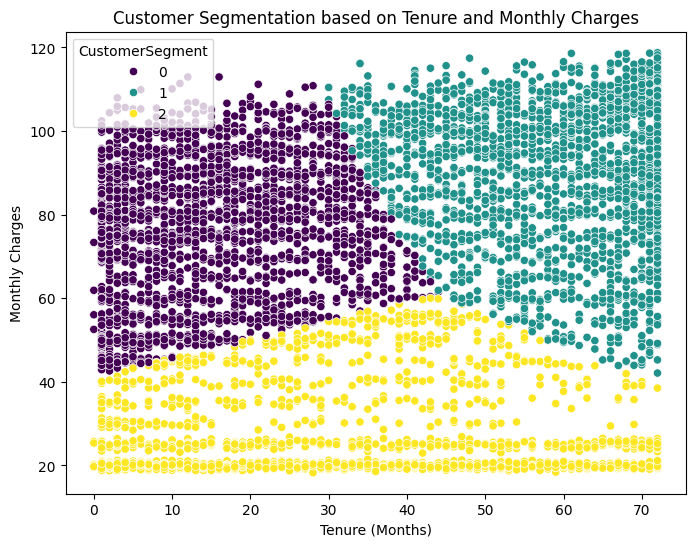

In [47]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=data['tenure'],
    y=data['MonthlyCharges'],
    hue=data['CustomerSegment'],
    palette='viridis'
)

plt.title('Customer Segmentation based on Tenure and Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.legend(title='CustomerSegment')
plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


* CustomerSegment 0 represents new customers with high monthly charges but low overall spending, indicating higher churn risk.
* CustomerSegment 1 consists of long-term, high-paying customers who are highly loyal and valuable.
* CustomerSegment 2 includes budget customers with moderate tenure and low spending.

In [ ]:
data.to_csv('Segmented_customers.csv', index=False)

# Churn Prediction Model



A churn prediction model is developed using Logistic Regression, a supervised machine learning algorithm.
The model predicts whether a customer is likely to churn based on selected features.

In [ ]:
segment_data = pd.read_csv('Segmented_customers.csv')
segment_data

## 10. Model Training and Testing

The dataset is split into training and testing sets.
The model is trained using the training data and evaluated on unseen test data to assess its performance.

In [ ]:
X=segment_data[['tenure','MonthlyCharges','TotalCharges','CustomerSegment']]
y=segment_data['Churn']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

## 11. Model Evaluation

The performance of the churn prediction model is evaluated using:

* Accuracy

* Precision

* Recall

* Confusion Matrix

These metrics help measure how well the model identifies churn-prone customers.

In [50]:
y_pred=model.predict(X_test)
print("Evaluation: ")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: ",classification_report(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)

Evaluation: 
Accuracy:  0.801277501774308
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:  [[952  84]
 [196 177]]


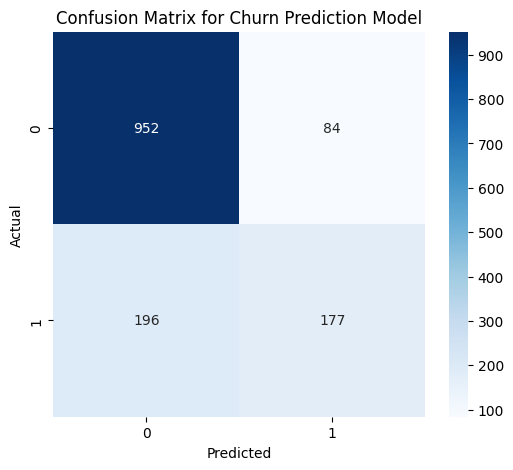

In [51]:
plt.figure(figsize=(6,5))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.title('Confusion Matrix for Churn Prediction Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


The confusion matrix visualizes the performance of the churn prediction model.
It shows the number of correctly and incorrectly classified churn and non-churn customers.


## 12. Combining Segmentation and Churn Insights

By combining customer segments with churn predictions, the project identifies:

* High-value customers at risk of churn

* Loyal customers with low churn probability

* Low-value customers requiring minimal intervention

This enables effective customer retention planning.

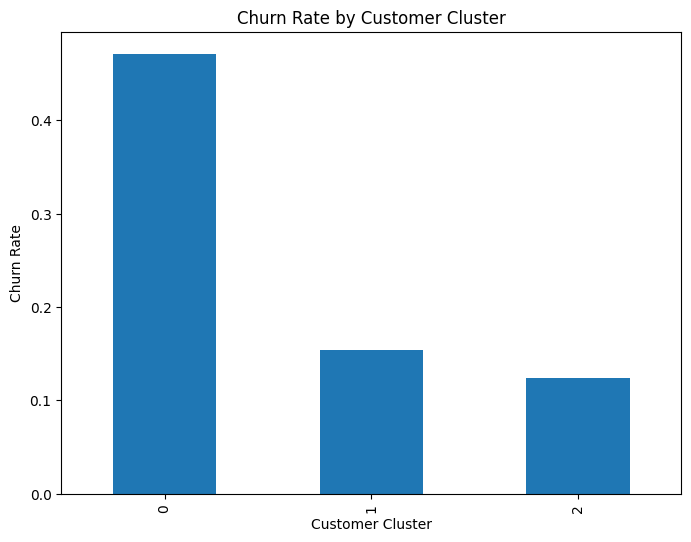

In [49]:
cluster_churn_rate = data.groupby('CustomerSegment')['Churn'].mean()
cluster_churn_rate

plt.figure(figsize=(8,6))

cluster_churn_rate.plot(kind='bar')

plt.title('Churn Rate by Customer Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Churn Rate')

plt.savefig('cluster_churn_rate.png', dpi=300, bbox_inches='tight')
plt.show()


This chart represents the churn rate for each customer cluster.
Clusters with higher churn rates indicate high-risk customer segments.
These insights help businesses prioritize retention strategies.


## 13. Business Insights and Retention Strategies

Based on the analysis, the following strategies are suggested:

* Provide personalized offers to high-value churn-prone customers

* Offer loyalty rewards to stable customers

* Optimize marketing efforts for different customer segments

## 14. Conclusion

This project demonstrates how machine learning can be used to analyze customer behavior and predict churn.
The combination of customer segmentation and churn prediction provides valuable insights that can help businesses improve customer retention and reduce revenue loss.

## 15. Future Enhancements

Possible improvements include:

* Using advanced models like Random Forest or XGBoost

* Including more customer features

* Deploying the model as a web application